In [1]:
import test_utils.image as image
import data.util as data_util
import pillow_heif

/home/yuang/anaconda3/envs/moe_sr/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
LQ_image1_path = '/data0/yuang/Invertible-Image-Rescaling/results/IRN_x4/desktop/desktop1_LR.png'
upscale_factor = 4
HR_img = image.upscale(image_dir=LQ_image1_path, from_dir=True, factor=upscale_factor)

creating model... export CUDA_VISIBLE_DEVICES=0
done in 670.420ms
loading image from /data0/yuang/Invertible-Image-Rescaling/results/IRN_x4/desktop/desktop1_LR.png... done in 4.182ms
upscaling image... Done in 1460.765ms


In [5]:
LQ_image2_path = '/data0/yuang/Invertible-Image-Rescaling/results/IRN_x4/desktop/desktop2_LR.png'
img_LQ_2 = data_util.read_img(None, LQ_image2_path, None)

In [3]:
import data.util as data_util
import os
delta_image_dir = './dataset/desktop/Deltas'

# for delta_image_name in os.listdir(delta_image_dir):
#     delta_image_path = os.path.join(delta_image_dir, delta_image_name)

#     delta_image = data_util.read_img(None, delta_image_path, None)
#     break
delta_image_path = '/data0/yuang/guided_sr/codes/dataset/desktop/Deltas/delta_image_125k_SwinIR.png'
delta_image = data_util.read_img(None, delta_image_path, None)


In [6]:
delta_image = delta_image * 2 - 1 # back to [-1, 1]
img_LQ_1 = img_LQ_2 + delta_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


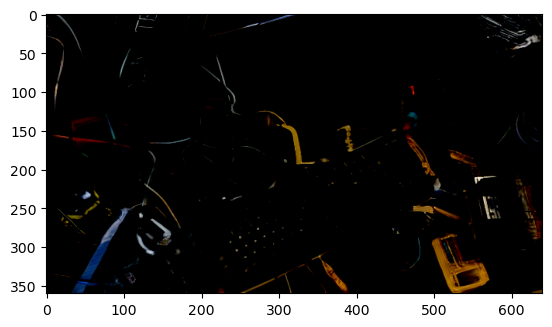

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img_LQ_1[:,:,[2,1,0]])

creating model... export CUDA_VISIBLE_DEVICES=0
done in 118.247ms
transforming image... done in 118.713ms
upscaling image... 

Done in 461.413ms


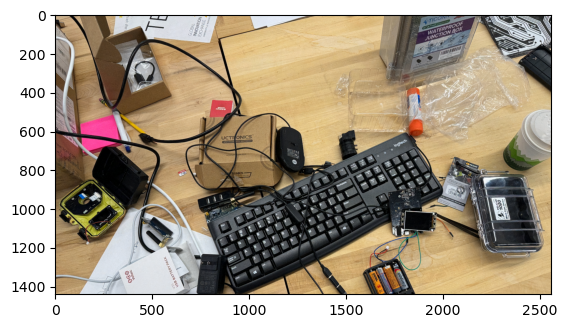

In [9]:
upscale_factor = 4
HR_img_desktop = image.upscale(image=img_LQ_1, from_dir=False, factor=upscale_factor)
plt.imshow(HR_img_desktop)

In [13]:
img_LQ_1

array([[[0.5490197 , 0.6862745 , 0.78039217],
        [0.56470597, 0.68235296, 0.8000001 ],
        [0.5607844 , 0.6980393 , 0.7803922 ],
        ...,
        [0.92156863, 0.8980392 , 0.85882354],
        [0.9019608 , 0.81960785, 0.7921569 ],
        [0.92156863, 0.8941177 , 0.87058824]],

       [[0.55686283, 0.69411767, 0.7921569 ],
        [0.5490197 , 0.6941177 , 0.78039217],
        [0.54509807, 0.68235296, 0.76862746],
        ...,
        [0.709804  , 0.6745099 , 0.6980393 ],
        [0.87058824, 0.88235295, 0.8352941 ],
        [0.92156863, 0.84313726, 0.827451  ]],

       [[0.5372549 , 0.6784314 , 0.78431374],
        [0.5294118 , 0.6745098 , 0.76862746],
        [0.5176471 , 0.6784314 , 0.7607843 ],
        ...,
        [0.5529412 , 0.4431373 , 0.53333336],
        [0.96470594, 0.90588236, 0.8862746 ],
        [0.8666667 , 0.8235294 , 0.8156863 ]],

       ...,

       [[0.3764706 , 0.56078434, 0.7254903 ],
        [0.3725491 , 0.56078434, 0.7254903 ],
        [0.38039216, 0

creating model... export CUDA_VISIBLE_DEVICES=0
done in 228.992ms
transforming image... done in 229.466ms
upscaling image... Done in 2315.536ms


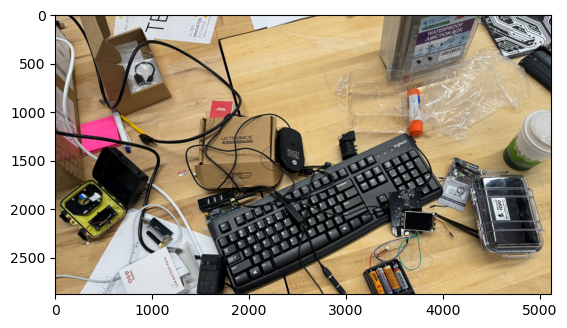

In [10]:
upscale_factor = 8
HR_img_desktop = image.upscale(image=img_LQ_1, from_dir=False, factor=upscale_factor)
plt.imshow(HR_img_desktop)

In [11]:
image_upscale.save_image(HR_img_desktop[:,:,[2,1,0]], 'HR_img_desktop1_from_delta_image_403k.png')

In [15]:
delta_image_dir = './dataset/desktop/Deltas'
delta_image_path = '/data0/yuang/guided_sr/codes/dataset/desktop/Deltas/delta_image_70k.jpg'
delta_image = data_util.read_img(None, delta_image_path, None)
delta_image = delta_image * 2 - 1 # back to [-1, 1]

img_LQ_1 = img_LQ_2 + delta_image

upscale_factor = 4
HR_img_desktop = image_upscale.upscale(image=img_LQ_1, from_dir=False, upscale_factor=upscale_factor)
image_upscale.save_image(HR_img_desktop[:,:,[2,1,0]], 'HR_img_desktop1_from_delta_image_70k.png')

creating model... export CUDA_VISIBLE_DEVICES=0
done in 81.914ms
transforming image... done in 82.349ms
upscaling image... Done in 452.599ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


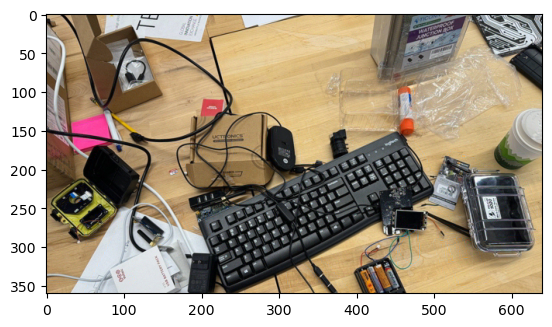

In [17]:
import numpy as np
delta_image_dir = './dataset/desktop/Deltas'
delta_image_path = '/data0/yuang/guided_sr/codes/dataset/desktop/Deltas/delta_image.heic'
heif_file = pillow_heif.open_heif(delta_image_path, convert_hdr_to_8bit=False, bgr_mode=True)
delta_image_arr = np.asarray(heif_file)
delta_image = delta_image_arr.astype(np.float32) / 255.
delta_image = delta_image * 2 - 1
img_LQ_1 = img_LQ_2 + delta_image
plt.imshow(img_LQ_1[:,:,[2,1,0]])


In [18]:
upscale_factor = 4
HR_img_desktop = image_upscale.upscale(image=img_LQ_1, from_dir=False, upscale_factor=upscale_factor)
image_upscale.save_image(HR_img_desktop[:,:,[2,1,0]], 'HR_img_desktop1_from_delta_image_heic.png')

creating model... export CUDA_VISIBLE_DEVICES=0
done in 122.930ms
transforming image... done in 123.517ms
upscaling image... Done in 458.329ms


In [ ]:
delta_image = data_util.read_img(None, delta_image_path, None)
delta_image = delta_image * 2 - 1 # back to [-1, 1]

img_LQ_1 = img_LQ_2 + delta_image

upscale_factor = 4
HR_img_desktop = image_upscale.upscale(image=img_LQ_1, from_dir=False, upscale_factor=upscale_factor)
image_upscale.save_image(HR_img_desktop[:,:,[2,1,0]], 'HR_img_desktop1_from_delta_image_70k.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


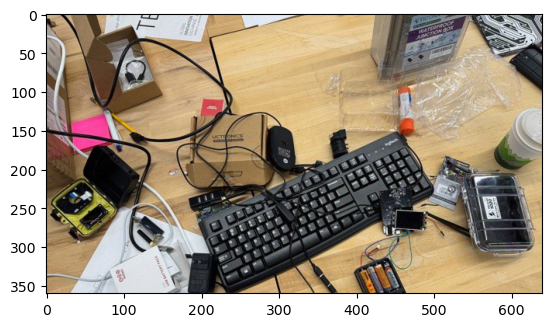

In [14]:
plt.imshow(img_LQ_1[:,:,[2,1,0]])

In [9]:
# test the difference between the two similar images
LQ_image1_path = '/data0/yuang/Invertible-Image-Rescaling/results/IRN_x4/desktop/desktop1_LR.png'

img_LQ_1 = data_util.read_img(None, LQ_image1_path, None)
img_LQ_2 = data_util.read_img(None, LQ_image2_path, None)

In [11]:
np.max(img_delta),np.min(img_delta)

(0.99215686, -1.0)

In [14]:
np.max(img_LQ_1),np.min(img_LQ_1)

(1.0, 0.0)

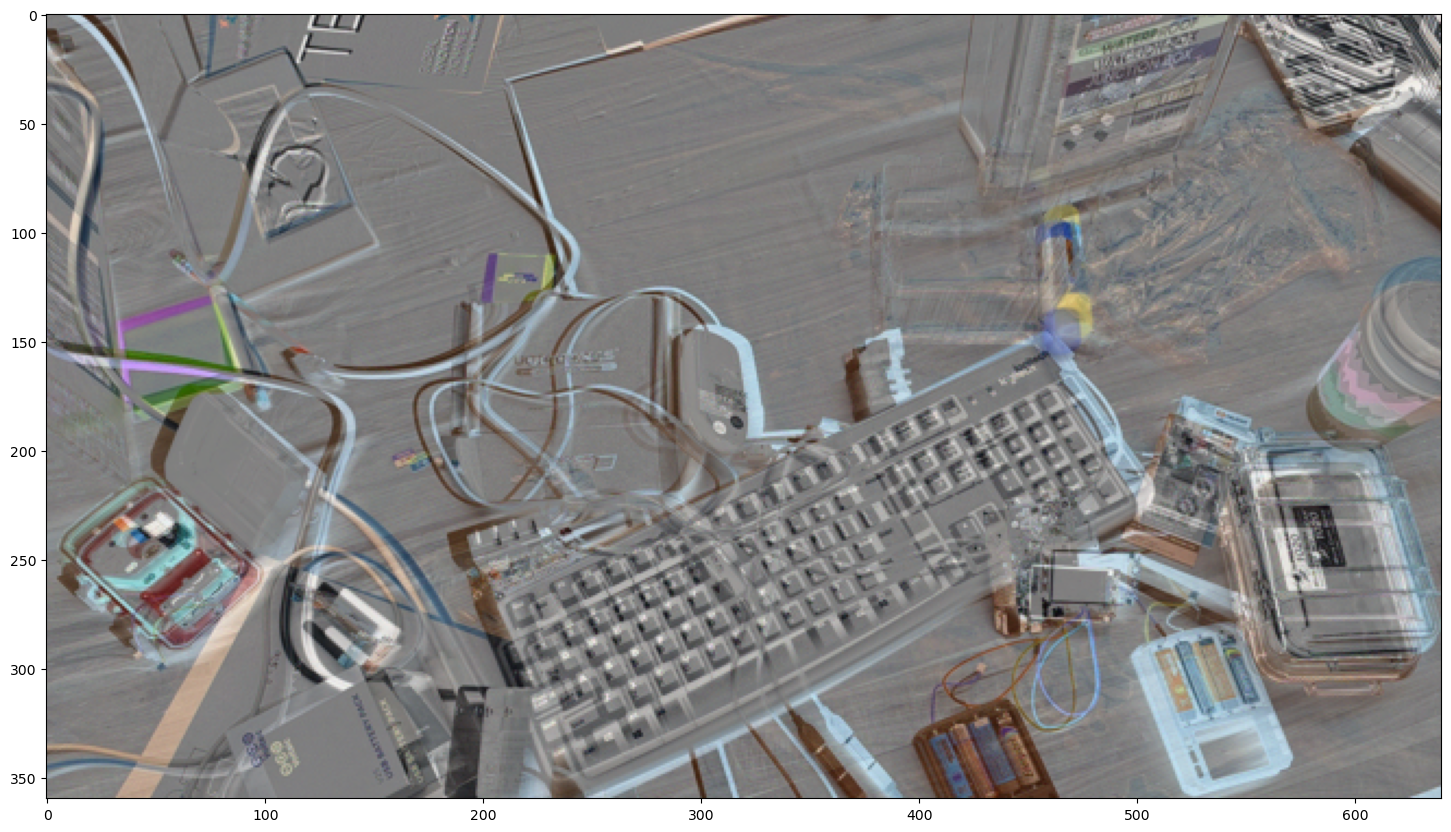

In [18]:
img_delta = img_LQ_1 - img_LQ_2
# use numpy built-in function to map the img_delta to range (0,1)
minval,maxval = -1,1
img_delta = (img_delta - minval)/(maxval-minval)
img_delta = (img_delta*255.0).round().astype(np.uint8)
# show the image
plt.figure(figsize=(18,32)) 
plt.imshow(img_delta)

util.save_img(img_delta,'./delta_image.png')



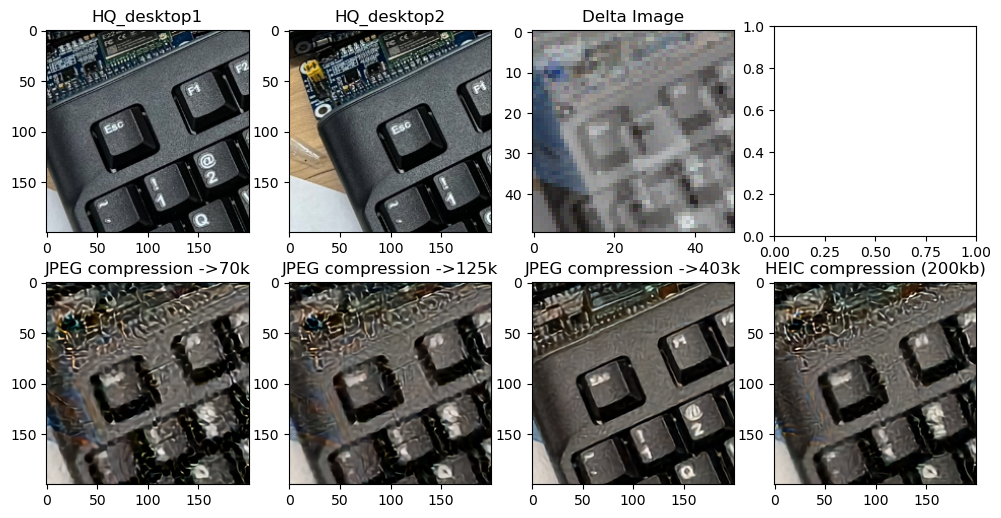

In [33]:
# cut the images and show the details
import os
import numpy as np
import matplotlib.pyplot as plt

#data_util.read_img(None, LQ_image2_path, None)

img_dir = '.'
img_prefix = 'HR_img_desktop1_from_delta_image_'

X_BIAS, Y_BIAS = 990,800
X_SIZE, Y_SIZE = 200,200
# show a row of 4 images
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# show original images
img_path_desktop1 = '/data0/yuang/guided_sr/codes/dataset/desktop/HR/desktop1.png'
img = data_util.read_img(None, img_path_desktop1, None)[:,:,[2,1,0]]
axs[0,0].imshow(img[X_BIAS:X_BIAS+X_SIZE,Y_BIAS:Y_BIAS+Y_SIZE,:])
axs[0,0].set_title('HQ_desktop1')

img_path_desktop2 = '/data0/yuang/guided_sr/codes/dataset/desktop/HR/desktop2.png'
img = data_util.read_img(None, img_path_desktop2, None)[:,:,[2,1,0]]
axs[0,1].imshow(img[X_BIAS:X_BIAS+X_SIZE,Y_BIAS:Y_BIAS+Y_SIZE,:])
axs[0,1].set_title('HQ_desktop2')

img_path_delta = '/data0/yuang/guided_sr/codes/delta_image.png'
img = data_util.read_img(None, img_path_delta, None)[:,:,[2,1,0]]
xbias = X_BIAS//4
ybias = Y_BIAS//4
xsize,ysize = X_SIZE//4,Y_SIZE//4
axs[0,2].imshow(img[xbias:xbias+xsize,ybias:ybias+ysize,:])
axs[0,2].set_title('Delta Image')

for idx,img_name in enumerate(['70k','125k','403k','heic']):
    img_path = os.path.join(img_dir, img_prefix+img_name+'.png')
    img = data_util.read_img(None, img_path, None)
    axs[1,idx].imshow(img[X_BIAS:X_BIAS+X_SIZE,Y_BIAS:Y_BIAS+Y_SIZE,:])
    if idx <= 2:
        axs[1,idx].set_title('JPEG compression ->'+img_name)
    else:
        axs[1,idx].set_title('HEIC compression (200kb)')

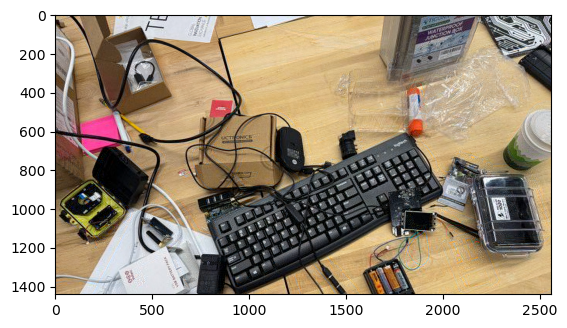

In [8]:
img = data_util.read_img(None, '/data0/yuang/guided_sr/codes/HR_img_desktop1_from_delta_image_70k.png', None)[:,:,[2,1,0]]


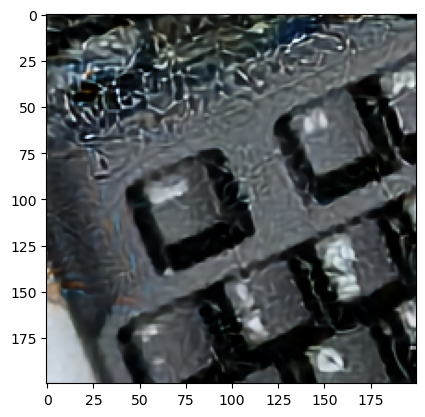

In [29]:
plt.imshow(img[990:1190,800:1000,[2,1,0]])